In [4]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
from random import randint
import pandas as pd
import warnings
from joblib import Parallel, delayed

In [12]:
# Adapted from ChatGPT
# Define the fitness function for Flip-Flop problem
fitness = mlrose.FourPeaks(t_pct=0.15)
state = 100
# Function to initialize problem
def initialize(problem_length):
    init_state = np.random.randint(2, size=problem_length)
    return problem_length, init_state

# Function to run optimization algorithms on a given problem
def run_optimizations(problem_length, state):
    problem_length, init_state_var = initialize(problem_length)
    problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)
    
    # Random Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem,
                                                                                  max_attempts=10, 
                                                                                  max_iters=1000, 
                                                                                  restarts=0, 
                                                                                  init_state=init_state_var, 
                                                                                  curve=True, 
                                                                                  random_state=state)
    rhc_time = time.time() - start_time
    
    # Simulated Annealing
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem,
                                                                                  schedule=mlrose.ExpDecay(),
                                                                                  max_attempts=10, 
                                                                                  max_iters=1000, 
                                                                                  init_state=init_state_var, 
                                                                                  curve=True, 
                                                                                  random_state=state)
    sa_time = time.time() - start_time
    
    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem, 
                                                                          pop_size=200, 
                                                                          mutation_prob=0.1, 
                                                                          max_attempts=10, 
                                                                          max_iters=1000, 
                                                                          curve=True, 
                                                                          random_state=state)
    ga_time = time.time() - start_time
    
    return rhc_best_state,sa_best_state,ga_best_state,rhc_best_fitness, sa_best_fitness, ga_best_fitness,rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve , rhc_time, sa_time, ga_time

# Define different problem sizes
problem_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 200, 250, 300, 350, 400, 450, 500]
rhc_best_fitness_values = []
sa_best_fitness_values = []
ga_best_fitness_values = []
rhc_times = []
sa_times = []
ga_times = []

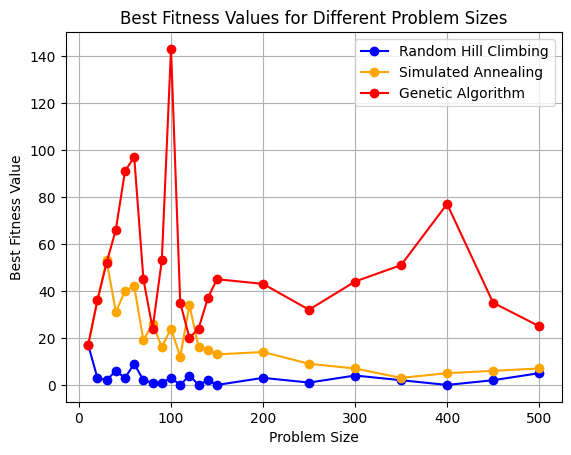

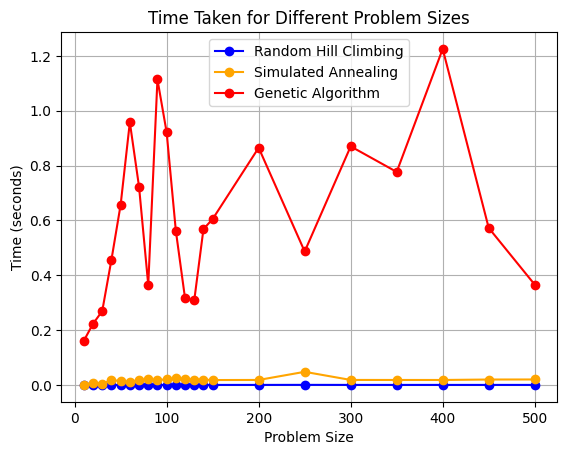

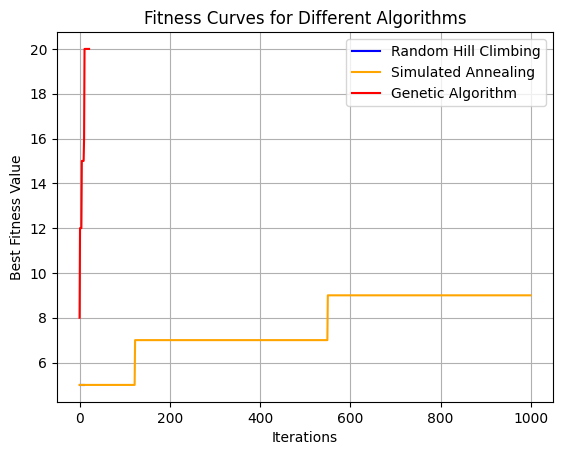

In [13]:
for size in problem_sizes:
    _,_,_,rhc_best_fitness, sa_best_fitness, ga_best_fitness,_,_,_,rhc_time, sa_time, ga_time = run_optimizations(size, state)
    rhc_best_fitness_values.append(rhc_best_fitness)
    sa_best_fitness_values.append(sa_best_fitness)
    ga_best_fitness_values.append(ga_best_fitness)
    rhc_times.append(rhc_time)
    sa_times.append(sa_time)
    ga_times.append(ga_time)


# Plotting the best fitness values for different problem sizes
plt.figure()

plt.plot(problem_sizes, rhc_best_fitness_values, label='Random Hill Climbing', marker='o', color='blue')
plt.plot(problem_sizes, sa_best_fitness_values, label='Simulated Annealing', marker='o', color='orange')
plt.plot(problem_sizes, ga_best_fitness_values, label='Genetic Algorithm', marker='o', color='red')

# Adding title and labels
plt.title('Best Fitness Values for Different Problem Sizes')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness Value')
# Adding legend
plt.legend()
# Adding grid
plt.grid()
# Show the plot
plt.show()

# Plotting the time taken for different problem sizes
plt.figure()

plt.plot(problem_sizes, rhc_times, label='Random Hill Climbing', marker='o', color='blue')
plt.plot(problem_sizes, sa_times, label='Simulated Annealing', marker='o', color='orange')
plt.plot(problem_sizes, ga_times, label='Genetic Algorithm', marker='o', color='red')

# Adding title and labels
plt.title('Time Taken for Different Problem Sizes')
plt.xlabel('Problem Size')
plt.ylabel('Time (seconds)')
# Adding legend
plt.legend()
# Adding grid
plt.grid()
# Show the plot
plt.show()

problem_length = 500
state = 123
_,_,_,_,_,_,rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve,_,_,_ = run_optimizations(problem_length, state)
# Plotting the fitness curves for each algorithm
plt.figure()

plt.plot(rhc_fitness_curve[:,0], label='Random Hill Climbing', color='blue')
plt.plot(sa_fitness_curve[:,0], label='Simulated Annealing', color='orange')
plt.plot(ga_fitness_curve[:,0], label='Genetic Algorithm', color='red')

# Adding title and labels
plt.title('Fitness Curves for Different Algorithms')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')

# Adding legend
plt.legend()

# Adding grid
plt.grid()

# Show the plot
plt.show()


In [14]:
# Define the fitness function for Flip-Flop problem
fitness = mlrose.FourPeaks(t_pct=0.15)

problem_length = 100
# Function to initialize problem
def initialize(problem_length):
    init_state = np.random.randint(2, size=problem_length)
    return problem_length, init_state

# Function to run optimization algorithms on a given problem
problem_length, init_state_var = initialize(problem_length)
problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)  
    # Random Hill Climbing
rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name="RHC_FlipFlop",
                    output_directory="./RHC_Optimization",
                    seed=state,
                    iteration_list=2**np.arange(10),
                    restart_list=2**np.arange(5),
                    max_attempts=10,
                    generate_curves=True,
                    init_state=init_state_var)

rhc_run_stats, rhc_run_curves = rhc.run()

    # Extract the best hyperparameters and fitness

decay_schedules = [mlrose.ExpDecay, mlrose.GeomDecay, mlrose.ArithDecay]
sa_results = []

for decay in decay_schedules:
    sa = mlrose.SARunner(problem=problem,
                            experiment_name="SA_FlipFlop",
                            output_directory="./SA_Optimization",
                            seed=state,
                            iteration_list=2**np.arange(10),
                            temperature_list=[1, 10, 50, 100, 250, 500, 1000],
                            restart_list=2**np.arange(5),
                            decay_list=[decay],
                            max_attempts=10,
                            generate_curves=True,
                            init_state=init_state_var)
    
    sa_run_stats, sa_run_curves = sa.run()
    sa_results.append((sa_run_stats, sa_run_curves))
    
    # Combine all SA results
combined_sa_run_stats = pd.concat([res[0] for res in sa_results])
combined_sa_run_curves = pd.concat([res[1] for res in sa_results])

# Genetic Algorithm
ga_results = []

for pop_size in [100, 200, 300]:
    for mutation_prob in [0.1, 0.2, 0.3]:
        ga = mlrose.GARunner(problem=problem,
                                experiment_name="GA_FlipFlop",
                                output_directory="./GA_Optimization",
                                seed=state,
                                iteration_list=2**np.arange(10),
                                population_sizes=[pop_size],
                                mutation_rates=[mutation_prob],
                                max_attempts=10,
                                generate_curves=True,
                                init_state=init_state_var)
        
        ga_run_stats, ga_run_curves = ga.run()
        ga_results.append((ga_run_stats, ga_run_curves))

# Combine all GA results
combined_ga_run_stats = pd.concat([res[0] for res in ga_results])
combined_ga_run_curves = pd.concat([res[1] for res in ga_results])

sorted_rhc_run_curves = rhc_run_curves.sort_values(by=['Fitness', 'Time', 'FEvals', 'max_iters'], 
                                                   ascending=[False, True, True, True])

# Display the sorted DataFrame
top_5_rhc_run_curves = sorted_rhc_run_curves.head(5)
#print(top_5_rhc_run_curves)

# Extract the best parameters from the sorted DataFrame
best_rhc_stats = sorted_rhc_run_curves.iloc[0]
best_fitness = best_rhc_stats['Fitness']
best_time = best_rhc_stats['Time']
best_fevals = best_rhc_stats['FEvals']
best_max_iters = best_rhc_stats['max_iters']
best_restarts = best_rhc_stats['Restarts']


# Print the best parameters
print("Best RHC Parameters:")
print(f"Best Fitness: {best_fitness}")
print(f"Time: {best_time}")
print(f"Function Evaluations: {best_fevals}")
print(f"Max Iterations: {best_max_iters}")
print(f"best_restarts: {best_restarts}")


sorted_sa_run_curves = combined_sa_run_stats.sort_values(by=['Fitness', 'Time', 'FEvals', 'Iteration'], ascending=[False, True, True, True])
top_5_sa_run_curves = sorted_sa_run_curves.head(5)
#print(top_5_sa_run_curves)

best_sa_stats = sorted_sa_run_curves.iloc[0]
best_fitness = best_sa_stats['Fitness']
best_time = best_sa_stats['Time']
best_fevals = best_sa_stats['FEvals']
best_max_iters = best_sa_stats['max_iters']
best_schedule_type = best_sa_stats['schedule_type']
best_Temparature = best_sa_stats['Temperature']

print("\n")

# Print the best parameters
print("Best SA Parameters:")
print(f"Best Fitness: {best_fitness}")
print(f"Time: {best_time}")
print(f"Function Evaluations: {best_fevals}")
print(f"Max Iterations: {best_max_iters}")
print(f"best_schedule_type: {best_schedule_type}")
print(f"best_Temparature: {best_Temparature}")

print("\n")

sorted_ga_run_curves = combined_ga_run_stats.sort_values(by=['Fitness', 'Time', 'FEvals', 'Iteration'], ascending=[False, True, True, True])

best_ga_stats = sorted_ga_run_curves.iloc[0]

best_fitness = best_ga_stats['Fitness']
best_time = best_ga_stats['Time']
best_fevals = best_ga_stats['FEvals']
best_max_iters = best_ga_stats['max_iters']
best_pop_size = best_ga_stats['Population Size']
best_mutation_prob = best_ga_stats['Mutation Rate']

# Print the best parameters
print("Best GA Parameters:")
print(f"Best Fitness: {best_fitness}")
print(f"Time: {best_time}")
print(f"Function Evaluations: {best_fevals}")
print(f"Max Iterations: {best_max_iters}")
print(f"best_population_size: {best_pop_size}")
print(f"best_mutation_prob: {best_mutation_prob}")


Best RHC Parameters:
Best Fitness: 12.0
Time: 0.01933354800030429
Function Evaluations: 11.0
Max Iterations: 512
best_restarts: 1


Best SA Parameters:
Best Fitness: 6.0
Time: 0.15211134400033188
Function Evaluations: 1018
Max Iterations: 512
best_schedule_type: exponential
best_Temparature: 10


Best GA Parameters:
Best Fitness: 98.0
Time: 2.755555725999784
Function Evaluations: 46691
Max Iterations: 512
best_population_size: 300
best_mutation_prob: 0.3
